Assume a process where

$\dot x = v_0 + a(x)b(t)$

If $x_b(0) = 0$ and $x_f(0) = d_0$, what $a(x)$ and $b(t)$ will decrease the distance $d(t) = x_f(t) - x_b(t)$ over time, yet without slowing down $x_b(t)$?

We consider the notion of periodic activation of a set of braking zones, where $b(t) = 1$ between $t_1^{z_i}$ and $t_2^{z_i}$ and 0 elsewhere.

Where/when should we activate our braking zones such that the distance $d(t)$ between two propagating synfire waves that were originally offset by a position $d(0) = d_0$ decays over time?

Given $x_b(0) = 0$, $x_f(0) = d_0$, $v_0$ and $v_1$:

what are the optimal

$x_1^{z_1}, x_2^{z_1}, x_1^{z_2}, x_2^{z_2}, ...$

and 

$t_1^{z_1}, t_2^{z_1}, t_1^{z_2}, t_2^{z_2}, ...$?

Assuming periodic braking zones, we must find

$t_1^{z_1}, x_1^{z_1}, \Delta t, \Delta x, \Delta t^*, \Delta x^*$

(see diagram for definitions)

Given $x_f(0) = d_0$ we should place the start of the first braking zone $x_1^{z_1}$ at $d_0$ and start it immediately. Thus

$x_1^{z_1} = d_0$

$t_1^{z_1} = 0$.

Next, although we want to maximize the time $x_f$ is being slowed we do not want to slow $x_b$ at all, so we turn off the control when $x_b$ reaches $x_1^{z_1}$, i.e. at $d_0/{v_0}$. Thus

$t_2^{z_1} = \Delta t = d_0/{v_0}$.

Next, it only makes sense to have the zone extend to where $x_f$ will be at $t_2^{z_1}$ since otherwise the rest goes unused and in fact increases the time we have to wait to turn on the control again since we have to wait for $x_b$ to pass through it. Thus

$\Delta x = v_1\Delta t = v_1d_0/v_0$.

We must now wait for $x_b$ to pass through the zone before we can turn the control on again, or else $x_b$ will be slowed, which we want to avoid. This will happen at $t_2^{z_1} + \Delta x/v_0 = \Delta t + \Delta x/v_0$. Thus

$t_1^{z_2} = \Delta t + \Delta x/v_0$

so

$\Delta t^* = t_1^{z_2} - t_1^{z_1} = \Delta t + \Delta x/v_0 = d_0/{v_0} + v_1d_0/v_0^2 = (d_0/v_0)(1 + v_1/v_0)$.

To decide where the second zone should start we will assume for robustness that the first zone failed to slow down $x_f$. Thus $x_1^{z_2}$ should be where we expect $x_f$ to be at $\Delta t^*$ with no slowing, which is just 

$x_1^{z_2} = d_0 + v_0\Delta t^*$

$\Delta x^* = x_1^{z_2} - x_1^{z_1} = v_0\Delta t^* = d_0(1 + v_1/v_0)$

# Demo of trajectory stability under periodic braking zone placement

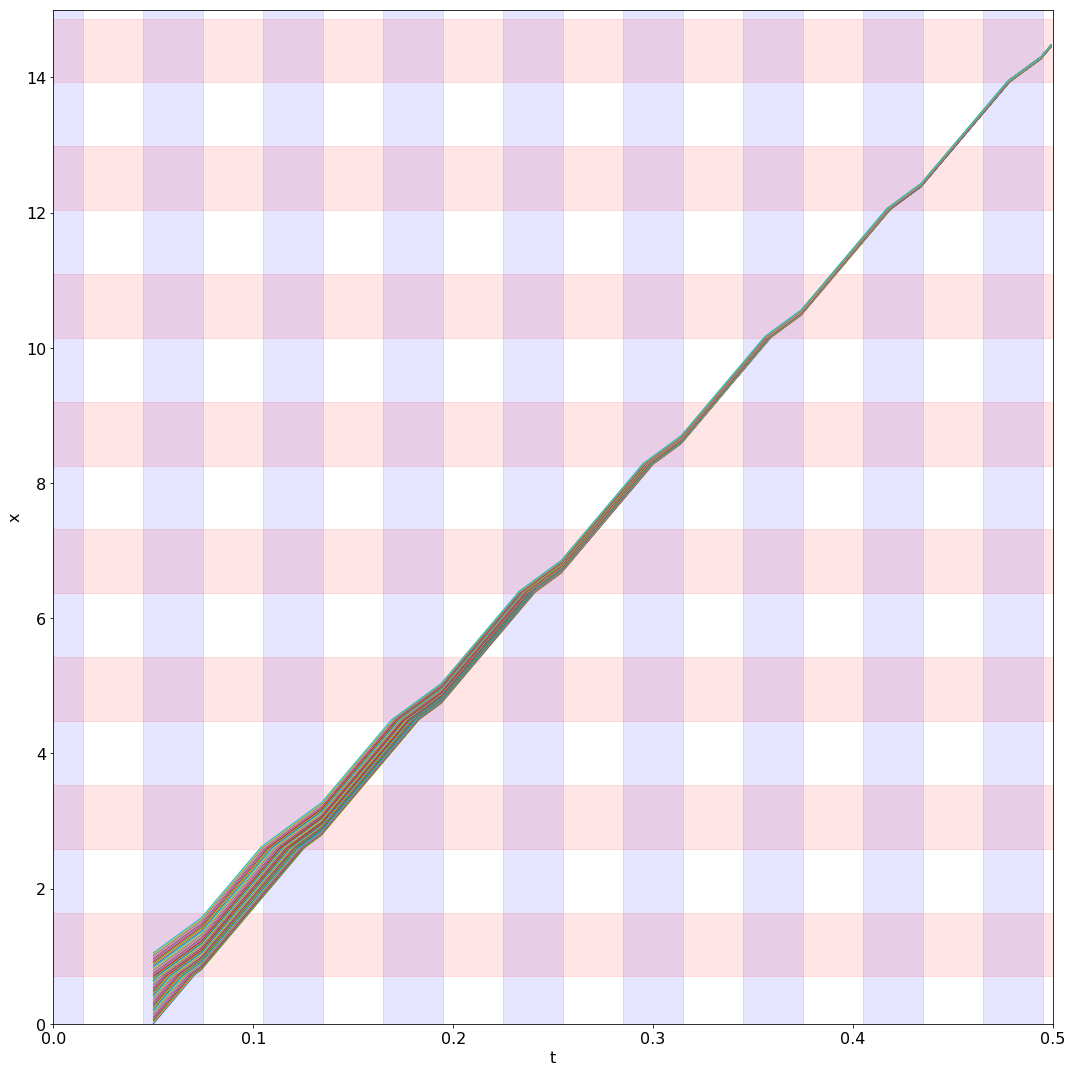

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size


DT = .001
V_0 = 34.99
V_1 = 21.67
T_0 = 0 - 0.015
X_0 = 0.7
DEL_T_S = .06
DEL_T = DEL_T_S/2
DEL_X_S = DEL_T_S * V_0 * .9  # scale factor must be < 1
DEL_X = DEL_X_S/2

X_START = np.linspace(0, 1.05)
T_START = 0.05

T_LIM = (0, .5)
X_LIM = (0, 15)

T_1 = np.arange(T_0, T_LIM[1], DEL_T_S)
T_2 = T_1 + DEL_T
X_1 = np.arange(X_0, X_LIM[1], DEL_X_S)
X_2 = X_1 + DEL_X


def a(x_):
    for x_1, x_2 in zip(X_1, X_2):
        if x_1 <= x_ < x_2:
            return 1
    return 0

def b(t_):
    for t_1, t_2 in zip(T_1, T_2):
        if t_1 <= t_ < t_2:
            return 1
    return 0
    

t2t = []
t2x = []

for x_start_ in X_START:
    t = np.arange(T_START, T_LIM[1], DT)
    x = np.nan * np.zeros(len(t))
    x[0] = x_start_
    
    for ct, t_ in enumerate(t[1:], 1):
        if a(x[ct-1])*b(t_) > 0:
            dx_dt = V_1
        else:
            dx_dt = V_0
        x[ct] = x[ct-1] + dx_dt*DT
    
    t2t.append(t.copy())
    t2x.append(x.copy())
    

fig, ax = plt.subplots(1, 1, figsize=(15, 15), tight_layout=True)

for t_1, t_2 in zip(T_1, T_2):
    ax.axvspan(t_1, t_2, color='b', alpha=0.1)
for x_1, x_2 in zip(X_1, X_2):
    ax.axhspan(x_1, x_2, color='r', alpha=0.1)
    
for t, x in zip(t2t, t2x):
    ax.plot(t, x, lw=1)

ax.set_xlim(*T_LIM)
ax.set_ylim(*X_LIM)

ax.set_xlabel('t')
ax.set_ylabel('x')

set_font_size(ax, 16)

Tuned to synfire params

In [2]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size


DT = .001
V_0 = 34.99
V_1 = 21.67
T_0 = 0.05 - .007
X_0 = 0 + 1
DEL_T_S = .06
DEL_T = DEL_T_S * .5
DEL_X_S = DEL_T_S * V_0 * .9  # scale factor must be < 1
DEL_X = DEL_X_S/2

T_LIM = (0, .5)
X_LIM = (0, 15)

T_1 = np.arange(T_0, T_LIM[1], DEL_T_S)
T_2 = T_1 + DEL_T
X_1 = np.arange(X_0, X_LIM[1], DEL_X_S)
X_2 = X_1 + DEL_X

# calc stable start point
DEL_T_SBL = (DEL_X_S + (DEL_T*(V_0 - V_1)) - (DEL_T_S*V_0)) / (V_0 - V_1)
DEL_X_SBL = -DEL_T_SBL*V_0

X_START = np.linspace(0, 1.25, 30)
T_START = 0.05

print('DEL_T_SBL =', DEL_T_SBL)
print('DEL_X_SBL =', DEL_X_SBL)

DEL_T_SBL = 0.014238738738738734
DEL_X_SBL = -0.4982134684684683


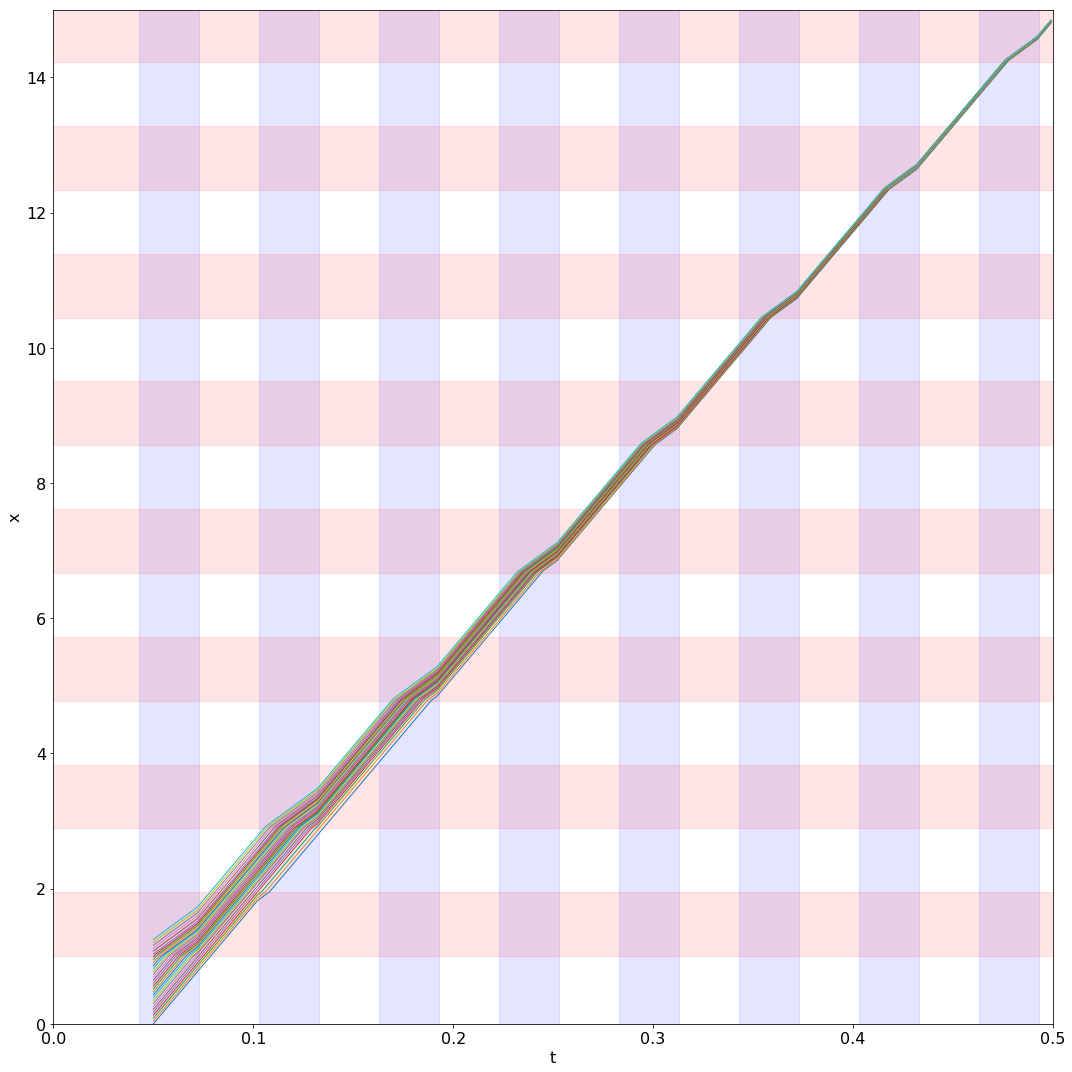

In [3]:
def a(x_):
    for x_1, x_2 in zip(X_1, X_2):
        if x_1 <= x_ < x_2:
            return 1
    return 0

def b(t_):
    for t_1, t_2 in zip(T_1, T_2):
        if t_1 <= t_ < t_2:
            return 1
    return 0
    

t2t = []
t2x = []

for x_start_ in X_START:
    t = np.arange(T_START, T_LIM[1], DT)
    x = np.nan * np.zeros(len(t))
    x[0] = x_start_
    
    for ct, t_ in enumerate(t[1:], 1):
        if a(x[ct-1])*b(t_) > 0:
            dx_dt = V_1
        else:
            dx_dt = V_0
        x[ct] = x[ct-1] + dx_dt*DT
    
    t2t.append(t.copy())
    t2x.append(x.copy())
    

fig, ax = plt.subplots(1, 1, figsize=(15, 15), tight_layout=True)

for t_1, t_2 in zip(T_1, T_2):
    ax.axvspan(t_1, t_2, color='b', alpha=0.1)
for x_1, x_2 in zip(X_1, X_2):
    ax.axhspan(x_1, x_2, color='r', alpha=0.1)
    
for t, x in zip(t2t, t2x):
    ax.plot(t, x, lw=1)

ax.set_xlim(*T_LIM)
ax.set_ylim(*X_LIM)

ax.set_xlabel('t')
ax.set_ylabel('x')

set_font_size(ax, 16)